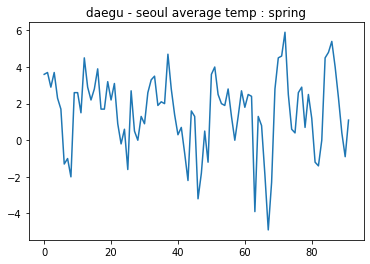

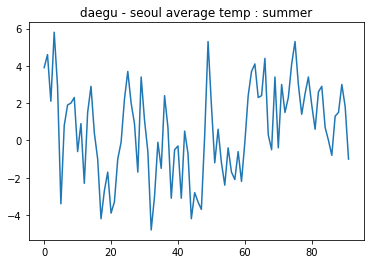

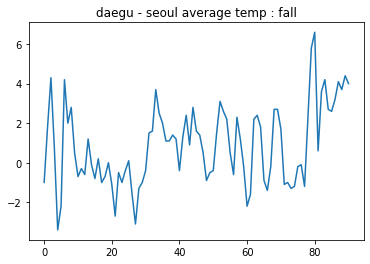

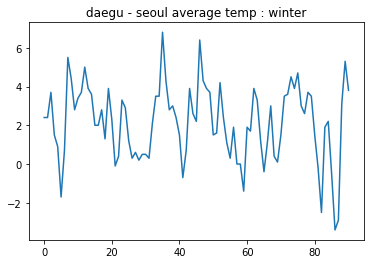

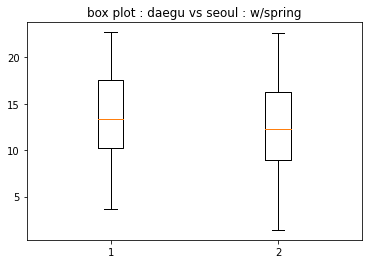

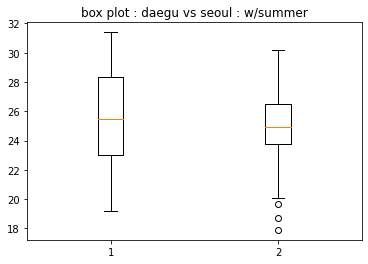

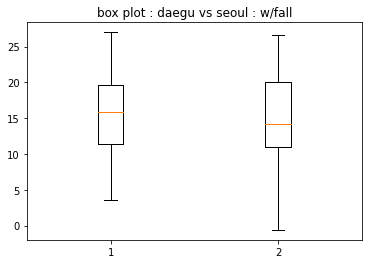

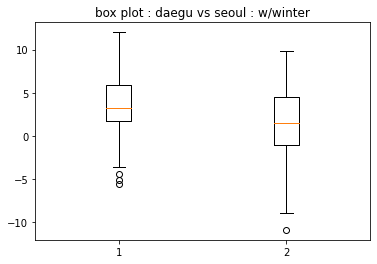

[0.2, 3.4, 3.6, 2.7, 2.2, 1.4, 7.0, 7.9, 3.2, 2.2, 3.3, 2.7, 2.1, 1.6, 0.9, 0.3, 1.4, 3.1, 3.2, 4.6, 1.9, 2.9, 5.0, 6.1, 7.2, 6.7, 6.2, 7.4, 6.2, 5.7, 4.4, 2.9, 3.6, 3.1, 1.9, -1.5, -2.1, 1.1, 2.9, 1.9, 5.5, 6.1, 8.1, 10.4, 10.7, 12.0, 5.0, -1.6, -0.2, 4.7, 6.1, 8.3, 8.2, 4.9, 8.1, 7.0, 8.3, 6.1, 4.5, 6.3, 3.0, 4.1, 4.6, 2.7, 3.3, 4.1, 4.5, 2.5, 1.9, 5.9, 6.8, 5.8, 2.5, -3.2, -4.4, -3.6, -1.9, 0.5, -1.4, -0.2, 0.5, 1.8, 2.0, 4.5, 1.4, 1.7, 2.4, 3.8, 3.2, -5.6, -5.1]


[-2.2, 1.0, -0.1, 1.2, 1.3, 3.1, 6.3, 2.4, -1.2, -0.6, -0.1, -1.0, -2.9, -2.3, -2.7, -1.7, -0.6, 0.3, 1.9, 0.7, -0.4, 3.0, 4.6, 2.8, 4.3, 5.5, 5.9, 6.8, 6.0, 5.2, 3.9, 2.6, 1.5, -0.4, -1.6, -8.3, -6.4, -1.7, -0.1, -0.5, 4.0, 6.8, 7.4, 6.5, 8.1, 9.8, -1.4, -5.9, -4.1, 1.0, 4.6, 6.7, 4.0, 2.5, 7.0, 6.7, 6.4, 6.1, 4.5, 7.7, 1.1, 2.4, 0.7, -0.6, 2.1, 4.5, 3.4, -0.5, 1.5, 5.8, 5.3, 2.3, -1.1, -7.7, -8.3, -8.3, -4.9, -2.1, -5.1, -3.7, -1.0, 2.0, 4.5, 2.6, -0.8, 2.2, 5.8, 6.7, 0.1, -10.9, -8.9]


In [24]:
import matplotlib.pyplot as plt
import csv
import sys

daeguf = open('..\daegu.csv')
seoulf = open('..\seoul.csv')

data_d = csv.reader(daeguf)
data_s = csv.reader(seoulf)
next(data_d)
next(data_s)

arr_d = [[],[],[],[]]
arr_s = [[],[],[],[]]

final_d = [[],[],[],[]]
final_s = [[],[],[],[]]



year = -1
month = -1

for row in data_d : 
    year = int(row[0].split('-')[0])
    month = int(row[0].split('-')[1])
    if year == 2020 :
        if row[2] == '' :
            row[2] = '0'
        if month == 12 or month <= 2 :
            arr_d[0].append(row)
        elif month >= 3 and month <= 5 :
            arr_d[1].append(row)
        elif month >= 6 and month <= 8 :
            arr_d[2].append(row)
        else :
            arr_d[3].append(row)

for row in data_s : 
    year = int(row[0].split('-')[0])
    month = int(row[0].split('-')[1])
    if year == 2020 :
        if row[2] == '' :
            row[2] = '0'
        if month == 12 or month <= 2 :
            arr_s[0].append(row)
        elif month >= 3 and month <= 5 :
            arr_s[1].append(row)
        elif month >= 6 and month <= 8 :
            arr_s[2].append(row)
        else :
            arr_s[3].append(row)

for i in range(0, 4) :
    arr = arr_d[i]
    for row in arr :
        final_d[i].append(float(row[2]))

for i in range(0, 4) :
    arr = arr_s[i]
    for row in arr :
        final_s[i].append(float(row[2]))

temp_diff = [[],[],[],[]]

for i in range(0,4) :
    for j in range(0, len(final_d[i])) :
        temp_diff[i].append(final_d[i][j] - final_s[i][j])

plt.title('daegu - seoul average temp : spring')
plt.plot(temp_diff[1])
plt.show()

plt.title('daegu - seoul average temp : summer')
plt.plot(temp_diff[2])
plt.show()

plt.title('daegu - seoul average temp : fall')
plt.plot(temp_diff[3])
plt.show()

plt.title('daegu - seoul average temp : winter')
plt.plot(temp_diff[0])
plt.show()

seasons = ['spring', 'summer', 'fall', 'winter']
for i in range (0, 4) :
    plt.title('box plot : daegu vs seoul : w/' + seasons[i])
    plt.boxplot([final_d[(i + 1) % 4], final_s[(i + 1) % 4]])
    plt.show()


print(final_d[0])
print('\n')
print(final_s[0])
